<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** José Pablo Jimenez Mendoza, Enrique Jair Rodríguez Orozco y Daniel Orozco Gómez

**Fecha:** 18 de Abril del 2023.

**Expediente** : 733762, 727454 y 728143.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Kike14/ProyectoConjunto_EJRodriguez_DOrozco_JPJimenez

# Proyecto TEMA-2

___

## NFL: SuperBowl Prediction
>En este proyecto, buscarémos a través de la simulación ver la posibilidad de que un equipo de la NFL llegue a la final de la competición, o sea, al superbowl. Esto lo harémos mediante 4 distintas variables significativas que mide que tanto afectan variables ajenas a las estrategias de un partido, el desempeño del equipo a lo largo de la temporada y en el desempeño en los playoffs. Con esto nos referimos a la cantidad de viento que hacía en un determinado lugar, la cantidad de puntos que se lograron hacer a lo largo de la temporada como local, la cantidad de puntos que se lograron hacer a lo largo de la temporada como visitante y la cantidad de puntos tanto como de visitante, como de local, en la fase final de la NFL. 

## 1.2 Objetivos.
> ### Objetivo general: Estimar una probabilidad que tiene un equipo de llegar al Superbowl mediante las variables obtenidas.

> ### Objetivos específicos:  
>1. Encontrar la correlación del viento con la cantidad de puntos por partido y evaluar su influencia en el juego.
2. Encontrar la media de puntos que debe de hacer un equipo para ganar como local.
3. Encontrar la media de puntos que debe de hacer un equipo para ganar como visitante.
4. Encontrar la media de puntos que debe de hacer un equipo para ganar un partido de playoffs.


### 1.3 Definición del problema.
> El escenario a modelar es la temporada regular y la fase final de la NFL. Este modelado, junto con las variables seleccionadas, nos ayudará a identificar la probabilidad de que un equipo determinado gane el superbowl. Será de mucha utilidad porque el fútbol americano es un deporte que puede cambiar mucho en muy poco.

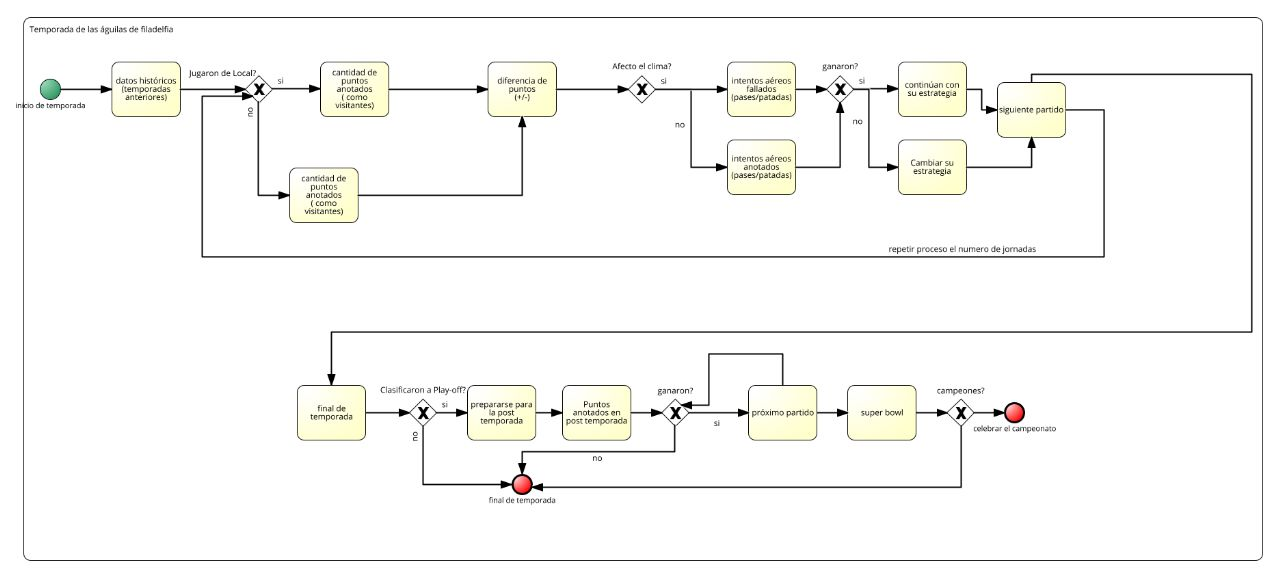

### 1.4 Nodos y variables que se decidieron simular y porqué


>1. Cantidad de viento (en mph) que hacía en determinada zona geográfica: En relación con los puntos en la NFL, los pases son de vital importancia para seguir ganando yardas a lo largo del terreno de juego para poder marcar, pero a estos pases los afectan situaciones externas como el viento, incluso, este último antes mencionado, afecta directamente a una jugada de gol, como sería el gol del campo, a la hora de que el pateador tiene esta oportunidad de sumar puntos, el viento influye en la trayectoria del balón.
2. Puntos marcados por un equipo determinado como local: en un deporte, los puntos son el feature principal para determinar el rendimiento real de un equipo (un equipo puede jugar mal y aún así ganar) y como bien sabemos, influye mucho el hecho de jugar en casa o no.
3. Puntos marcados por un equipo como visitante: en un deporte, los puntos son el feature principal para determinar el rendimiento real de un equipo (un equipo puede jugar mal y aún así ganar) y como bien sabemos, influye mucho el hecho de jugar en casa o no.
4. Puntos marcados por un equipo en playoffs: El rendimiento de un equipo es muy diferente en la temporada regular que en los playoffs y esto está comprobado empíricamente, por lo que puedes hacer muy buena temporada y al final quedarte en el camino.


### 1.5 Supuestos.

>1. Las reglas bases de la NFL y el fútbol americano siguen vigentes.
2. La tecnología usada sigue siendo la misma.
3. No existen cambios en la identidad de los equipos.
4. Consideramos una determinada ventana de tiempo a lo largo del modelo.

### 1.6 Obtención de bases de datos
> Nuestra fuente de datos principal será kaggle de la mano de datos oficiales mostrados en la página de la NFL.

## Simulaciones. (Es discreta? Variable de interés? son muy pocos datos? )

Cmbie los bins, hay problema? por que si tomo los datos con los corchetes si me deja graficar con plt.hist? como mide el error el codigo? explicarle como piensas, todo el problema del x_grid? no tengo prueba de hipotesis para la distr porque ninguna se asemeja, hay problema? el problema era el bandwidth, la función me determina el mejor? 

tenemos que usar la hipotesis de distribución si no vamos a usar ese metodo?
SI

Tenemos que poner conclusiones de cada nodo y en general de nuestros resultados.

A partir de tener nuestras variables aleatorias, nos empezamos a preguntar cosas.
Hacer intervalos de confianza para montecarlo

Juntar los 4 nodos para concluir si se cumple el objetivo general.


In [ ]:
### Librerias
import pandas as pd
import numpy as np
import scipy.stats as st     
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from scipy import optimize

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.model_selection import GridSearchCV
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#### Obtención de datos
home_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'Home Pats', index_col = 0)
away_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'Away Pats', index_col = 0)
POP_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'POP')
W_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'WW')
hd = home_data['score_home']
ad = away_data['score_away']
ww = W_data['weather_wind_mph']
pop = POP_data['Points']

In [ ]:
#PABUL
plt.hist(hd)
plt.xlabel('Cantidad de puntos.')
plt.ylabel('Frecuencia')
plt.title('Juegos de Local')
plt.show()

plt.hist(ad)
plt.xlabel('Cantidad de puntos.')
plt.ylabel('Frecuencia')
plt.title('Juegos de Visitante')
plt.show()

plt.hist(ww)
plt.xlabel('Viento en MPH.')
plt.ylabel('Frecuencia')
plt.title('Massachusetts')
plt.show()

plt.hist(pop)
plt.xlabel('Cantidad de puntos.')
plt.ylabel('Frecuencia')
plt.title('puntos en post temporada')
plt.show()


In [ ]:
#DANIEL

dist = 'beta'
params = getattr(st, dist).fit(hd)

random_hat = getattr(st, dist).rvs(*params, size = 100)

plt.hist(hd, bins = 15, label = 'data real', density = True)
plt.hist(random_hat, bins = 15, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

In [ ]:
#PABUL
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(hd, bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(hd)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

In [ ]:
#DANIEL
params2 = getattr(st, dist).fit(ad)

random_hat2 = getattr(st, dist).rvs(*params2, size = 100)

plt.hist(ad, bins = 20, label = 'data real', density = True)
plt.hist(random_hat2, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

In [ ]:
#PABUL
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(ad, bins = 20, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(ad)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

In [ ]:
#DANIEL
params3 = getattr(st, dist).fit(ww)

random_hat3 = getattr(st, dist).rvs(*params3, size = 100)

plt.hist(ww, bins =15, label = 'data real', density = True)
plt.hist(random_hat3, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

In [ ]:
#PABUL
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(ww, bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(ww)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

In [ ]:
#DANIEL
params4 = getattr(st, dist).fit(pop)

random_hat4 = getattr(st, dist).rvs(*params4, size = 100)

plt.hist(pop, bins = 10, label = 'data real', density = True)
plt.hist(random_hat4, bins = 10, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

In [ ]:
#PABUL
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(pop, bins = 10, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(pop)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

In [ ]:
#PABUL
divisiones = 15
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(hd, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(hd)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(hd, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

In [ ]:
#PABUL

divisiones = 20
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(ad, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(ad)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(ad, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

In [ ]:
#PABUL

divisiones = 20
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(ww, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(ww)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(ww, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

In [ ]:
#PABUL

divisiones = 15
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(pop, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(pop)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(pop, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

In [ ]:
#PABUL
x_grid = np.linspace(-4.5, 3.5)
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) 
grid.fit(hd[:, None])
print(grid.best_params_)

In [ ]:
#PABUL
sns.histplot(data=hd, stat='density', kde=True, kde_kws={'bw_method': 0.16206896551724137}, color='r', bins=15)

In [ ]:
#PABUL
grid1 = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) 
grid1.fit(ad[:, None])
print(grid1.best_params_)

In [ ]:
#PABUL 

sns.histplot(data=ad, stat='density', kde=True, kde_kws={'bw_method': 0.25517241379310346}, color='r', bins=20)

In [ ]:
#PABUL
grid2 = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) 
grid2.fit(ww[:, None])
print(grid2.best_params_)

In [ ]:
#PABUL 

sns.histplot(data=ww, stat='density', kde=True, kde_kws={'bw_method': 0.1}, color='r', bins=20)

In [ ]:
#PABUL
grid3 = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) 
grid3.fit(pop[:, None])
print(grid3.best_params_)

In [ ]:
#PABUL 
#revisar
sns.histplot(data=pop, stat='density', kde=True, kde_kws={'bw_method': 1}, color='r', bins=20)

In [ ]:
def kde_statsmodels_m2(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  
                          var_type='c', **kwargs)
    return lambda x_i: kde.pdf(x_i)

def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f', x):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    plt.plot(x, f(x), label = 'f(x)', linewidth = 3, color = 'black')
    plt.plot(x, t(x), label = 't(x)', linewidth = 3, color = 'gray')

    plt.legend()           
    plt.show()



In [ ]:
#PABUL 
f1 = kde_statsmodels_m2(hd.values)
f2 = kde_statsmodels_m2(ad.values)
f3 = kde_statsmodels_m2(ww.values)
f4 = kde_statsmodels_m2(pop.values)

In [ ]:
#PABUL
x_grid = np.linspace(-1, 60, 1000)

In [ ]:
#PABUL
plt.plot(x_grid, f1(x_grid))
plt.hist(hd.values, bins=15, density=True)

In [ ]:
#PABUL
x_grid1 = np.linspace(-1, 60, 1000)

In [ ]:
#PABUL
plt.plot(x_grid1, f2(x_grid1))
plt.hist(ad.values, bins=20, density=True)

In [ ]:
#PABUL
x_grid2 = np.linspace(5, 26, 1000)

In [ ]:
#PABUL
## revisar 

plt.plot(x_grid2, f3(x_grid2))
plt.hist(ww.values, bins=20, density=True)

In [ ]:
#PABUL
x_grid3 = np.linspace(4, 46, 1000)

In [ ]:
#PABUL
plt.plot(x_grid3, f4(x_grid3))
plt.hist(pop.values, bins=10, density=True)

In [ ]:
N = 100000
x = np.arange(.1,60,0.1)
R2 = np.random.uniform(.1, 60, N)
R1 =np.random.uniform(.1, 60, N)
R2_C = 60-R2+.1
R1_C = 60-R2+.1

R1F = np.concatenate([R1, R1_C])
R2F = np.concatenate([R2, R2_C])

max_f = f1(optimize.fmin(lambda x:-f1(x), 0, disp=False))

t = lambda x: max_f * np.ones(len(x))

print('El máximo de f es:',max_f)

plt.plot(x,f1(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

VA1 = Acep_rechazo3(R2F, R1F, f1, t)
plt.hist(VA1, bins=20, density=True)

In [ ]:
max_f2 = f2(optimize.fmin(lambda x:-f2(x), 0, disp=False))

t2 = lambda x: max_f2 * np.ones(len(x))

print('El máximo de f2 es:',max_f2)

plt.plot(x,f2(x),label='f(x)')
plt.plot(x,t2(x),label='t(x)')
plt.legend()

VA2 = Acep_rechazo3(R2F, R1F, f2, t2)
plt.hist(VA2, bins=20, density=True)

In [ ]:
x = np.arange(4,30,0.1)
R2 = np.random.uniform(4, 30, N)
R1 =np.random.uniform(4, 30, N)
R2_C = 30-R2+4
R1_C = 30-R2+4

R1F = np.concatenate([R1, R1_C])
R2F = np.concatenate([R2, R2_C])
max_f3 = f3(optimize.fmin(lambda x:-f3(x), 0, disp=False))

t3 = lambda x: max_f3 * np.ones(len(x))

print('El máximo de f2 es:',max_f3)

plt.plot(x,f3(x),label='f(x)')
plt.plot(x,t3(x),label='t(x)')
plt.legend()

VA3 = Acep_rechazo3(R2F, R1F, f3, t3)
plt.hist(VA3, bins=20, density=True)

In [ ]:
x = np.arange(.1,46,0.1)
R2 = np.random.uniform(.1, 46, N)
R1 =np.random.uniform(.1, 46, N)
R2_C = 46-R2
R1_C = 46-R2

R1F = np.concatenate([R1, R1_C])
R2F = np.concatenate([R2, R2_C])
max_f4 = f4(optimize.fmin(lambda x:-f4(x), 0, disp=False))

t4 = lambda x: max_f4 * np.ones(len(x))

print('El máximo de f2 es:',max_f4)

plt.plot(x,f4(x),label='f(x)')
plt.plot(x,t4(x),label='t(x)')
plt.legend()

VA4 = Acep_rechazo3(R2F, R1F, f4, t4)
plt.hist(VA4, bins=20, density=True)